## test_1

In [29]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

C:\Users\Somya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
x = sp.symbols('x')
y = sp.symbols('y')

F = sp.Function('F')(x,y)
F = sp.sin(2*x)*sp.cos(1.5*y)

In [43]:
## (i)

u = F.diff(y,1)
v = - F.diff(x,1)

In [44]:
u

-1.5*sin(2*x)*sin(1.5*y)

In [45]:
v

-2*cos(2*x)*cos(1.5*y)

In [46]:
## (ii)
speed = sp.sqrt(u**2+v**2)

In [63]:
## (iii)
xa = np.linspace(0, 2*np.pi, 50) 
ya = np.linspace(0, 2*np.pi, 50) 
X, Y = np.meshgrid(xa, ya)

xb = np.linspace(0,2*np.pi,200)
yb = np.linspace(0,2*np.pi,200)
X_fine, Y_fine = np.meshgrid(xb, yb)

def x_vel(x_,y_):
    return -1.5*np.sin(2*x_)*np.sin(1.5*y_)

def y_vel(x_,y_):
    return -2*np.cos(2*x_)*np.cos(1.5*y_)

In [89]:
U = x_vel(X,Y)
V = y_vel(X,Y)


interpolated = griddata((X.flatten(),Y.flatten()), U.flatten(), (X_fine.flatten(), Y_fine.flatten()), method='cubic')

In [90]:
def speed(x1,y1):
    return np.sqrt(x1**2+y1**2)

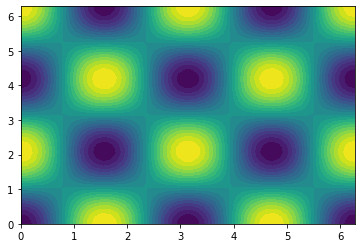

In [186]:
plt.contourf(X,Y, U, levels=20, cmap='viridis')


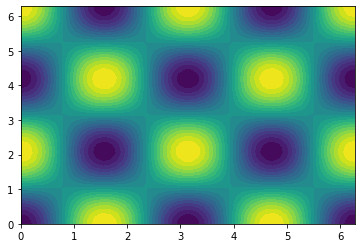

In [187]:
plt.contourf(X,Y,V,levels=20, cmap='viridis')

In [ ]:
## 2 

In [203]:
A = [[4,1,2], [1,3,0], [2,0,5]]
b = [[4],[5],[6]]

In [212]:
n_iter = 20
tolerance = 1e-6

x0 = [[1],[1],[1]]
r0 = b - np.dot(A,x0)
p0 = r0.copy()
ri = r0
pi = p0
xi = x0

In [221]:
for i in range(n_iter):
    
    ai = np.dot(np.transpose(ri),ri)/np.dot(np.dot(np.transpose(pi),A), pi)
    xi1 = xi + ai*pi
    ri1 = ri - np.dot(ai*A,pi)
    
    bi = np.dot(np.transpose(ri1), ri1)/np.dot(np.transpose(ri), ri)
    pi = ri1+bi*pi
    
    t=0
    for i in ri1:
        t+= i**2
    
    if t<tolerance:
        break

In [87]:
## 3

In [155]:
r,G, mu = sp.symbols('r G mu')
u = sp.Function('u')(r)

## 1/r(r*d2u/dr2 + du/dr) = 1/mu*(G)
eq = sp.Eq(u.diff(r,2)+1/r*(u.diff(r,1)), G/mu)

In [156]:
eq

Eq(Derivative(u(r), (r, 2)) + Derivative(u(r), r)/r, G/mu)

In [157]:
R1 = sp.symbols('R1')
R2 = sp.symbols('R2')
bcs = {u.subs(r,R1):0, u.subs(r,R2):0}

In [158]:
sol = sp.dsolve(eq, ics=bcs)

In [159]:
sol

Eq(u(r), G*R1**2*log(R2)/(4*mu*log(R1) - 4*mu*log(R2)) - G*R2**2*log(R1)/(4*mu*log(R1) - 4*mu*log(R2)) + G*r**2/(4*mu) + (-G*R1**2/(4*mu*log(R1) - 4*mu*log(R2)) + G*R2**2/(4*mu*log(R1) - 4*mu*log(R2)))*log(r))

In [175]:
du_dr = sp.Function('du_dr')(r)
du_dr = (sol.rhs).diff(r,1)
du_dr

G*r/(2*mu) + (-G*R1**2/(4*mu*log(R1) - 4*mu*log(R2)) + G*R2**2/(4*mu*log(R1) - 4*mu*log(R2)))/r

In [174]:
# du_dr = sp.Eq(du_dr,0)

False

In [180]:
optima = sp.solve(du_dr,r)
Ro = optima[1]
Ro

sqrt(2)*sqrt((R1**2 - R2**2)/(log(R1) - log(R2)))/2

In [125]:
## 4

In [126]:
## (i)

In [129]:
r,a,ui,b = sp.symbols('r a ui b')

uz = sp.Function('uz')(r)

eq = sp.Eq((1/r)*uz.diff(r,1)+uz.diff(r,2),0)

In [130]:
eq

Eq(Derivative(uz(r), (r, 2)) + Derivative(uz(r), r)/r, 0)

In [131]:
bcs = {uz.subs(r,a):ui, uz.subs(r,b):0}

In [132]:
sol = sp.dsolve(eq,ics=bcs)

In [133]:
sol

Eq(uz(r), -ui*log(b)/(log(a) - log(b)) + ui*log(r)/(log(a) - log(b)))

In [138]:
## uz = (ui*log(r/b))/log(a/b)
w = sp.symbols('omega')

In [134]:
## (ii)

In [142]:
utheta = sp.Function('utheta')(r)

eq_theta = sp.Eq(utheta.diff(r,2) - utheta/(r**2) - (1/r)*utheta.diff(r,1),0)
eq_theta

Eq(Derivative(utheta(r), (r, 2)) - Derivative(utheta(r), r)/r - utheta(r)/r**2, 0)

In [147]:
bcs2 = {utheta.subs(r,a):w*a, utheta.subs(r,b):w*b}
bcs2

{utheta(a): a*omega, utheta(b): b*omega}

In [181]:
sol_theta = sp.dsolve(eq_theta, ics=bcs2)
sol_theta

Eq(utheta(r), r**(1 - sqrt(2))*(a*a**(sqrt(2))*a**(-1 + sqrt(2))*b*b**(-1 + sqrt(2))*omega/(a*a**(sqrt(2))*a**(-1 + sqrt(2)) - b*b**(sqrt(2))*b**(-1 + sqrt(2))) - a*a**(-1 + sqrt(2))*b*b**(sqrt(2))*b**(-1 + sqrt(2))*omega/(a*a**(sqrt(2))*a**(-1 + sqrt(2)) - b*b**(sqrt(2))*b**(-1 + sqrt(2)))) + r**(1 + sqrt(2))*(a*a**(-1 + sqrt(2))*omega/(a*a**(sqrt(2))*a**(-1 + sqrt(2)) - b*b**(sqrt(2))*b**(-1 + sqrt(2))) - b*b**(-1 + sqrt(2))*omega/(a*a**(sqrt(2))*a**(-1 + sqrt(2)) - b*b**(sqrt(2))*b**(-1 + sqrt(2)))))

In [182]:
## r-momentum

In [194]:
p_i,rho= sp.symbols('p_i rho')

p = sp.Function('p')(r)

In [196]:
eq_p = sp.Eq(p.diff(r,1)- rho*(utheta**2)/r,0)
eq_p

Eq(Derivative(p(r), r) - rho*utheta(r)**2/r, 0)

In [197]:
bcs3 = {p.subs(r,a):p_i}

In [198]:
sol = sp.dsolve(eq_p, ics=bcs3)

In [200]:
sol.rhs

p_i - rho*Integral(utheta(a)**2/a, a) + rho*Integral(utheta(r)**2/r, r)